## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [3]:
dat =pd.read_csv("/Users/ghidoni/data/data_000637.txt")
N=50000
head=dat.head(N)
print(head)
print(dat)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0         1     0          123  3869200167        2374        26
1         1     0          124  3869200167        2374        27
2         1     0           63  3869200167        2553        28
3         1     0           64  3869200167        2558        19
4         1     0           64  3869200167        2760        25
...     ...   ...          ...         ...         ...       ...
49995     1     1            2  3869200664        1103         4
49996     1     1            4  3869200664        1105        14
49997     1     0           59  3869200664        1191        17
49998     1     0           32  3869200664        1191         1
49999     1     0           60  3869200664        1190         6

[50000 rows x 6 columns]
         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374    

2\. Find out the number of BX in a ORBIT (the value 'x').



In [4]:
maxim=dat.groupby(['ORBIT_CNT']).max()
print(maxim["BX_COUNTER"]+1)
print(maxim["BX_COUNTER"].max()+1)

ORBIT_CNT
3869200167    3188
3869200168    3539
3869200169    2767
3869200170    3378
3869200171    3543
              ... 
3869211167    3554
3869211168    3557
3869211169    3499
3869211170    3528
3869211171     770
Name: BX_COUNTER, Length: 11001, dtype: int64
3564


In [5]:
maxsum=dat.groupby(['ORBIT_CNT']).sum()
print(maxsum)

            HEAD  FPGA  TDC_CHANNEL  BX_COUNTER  TDC_MEAS
ORBIT_CNT                                                
3869200167    43     6         2683      124133       619
3869200168    85    36         4376       97201      1134
3869200169   127    37         6727      144343      1688
3869200170    98    32         5183      217462      1308
3869200171   109    30         6562      228822      1482
...          ...   ...          ...         ...       ...
3869211167   208    80        10909      361697      2780
3869211168   109    24         6825      205302      1551
3869211169   191    49        10815      311322      2628
3869211170   137    47         8588      277743      1830
3869211171    22     5         1235        7573       285

[11001 rows x 5 columns]


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.



In [6]:
a=dat["TDC_MEAS"]*25/30
b=dat["BX_COUNTER"]*25
#c= dat.pivot_table(index=['ORBIT_CNT'], aggfunc='size')
time=a+b

print(a)
print(b)



print(len(a))
print(len(b))


print(time)
print((time.sum()+dat["ORBIT_CNT"].max()-dat["ORBIT_CNT"].min())/10**9)






#c= dat.pivot_table(index=['ORBIT_CNT'], aggfunc='size')


0          21.666667
1          22.500000
2          23.333333
3          15.833333
4          20.833333
             ...    
1310715    11.666667
1310716     9.166667
1310717     0.000000
1310718     0.000000
1310719    15.000000
Name: TDC_MEAS, Length: 1310720, dtype: float64
0          59350
1          59350
2          63825
3          63950
4          69000
           ...  
1310715    19050
1310716    19075
1310717    19100
1310718    19225
1310719    19050
Name: BX_COUNTER, Length: 1310720, dtype: int64
1310720
1310720
0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Length: 1310720, dtype: float64
58.377528181500026


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).



In [7]:
dat["ABS_TIME"]=time
print(dat)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

             ABS_TIME  
0        59371.666667  
1        59372.500000  
2        63848.333333  
3        63965.833333  
4        69020.833333  
...            

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.



In [8]:
dat["HEAD"]=np.random.randint(0,2,len(dat))

6\. Create a new DataFrame that contains only the rows with HEAD=1.



In [9]:
new = dat[(dat["HEAD"] == 1)]
new

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
5,1,0,63,3869200167,2762,4,69053.333333
7,1,0,139,3869200167,2776,0,69400.000000
11,1,0,64,3869200167,2786,19,69665.833333
...,...,...,...,...,...,...,...
1310712,1,1,35,3869211171,429,4,10728.333333
1310716,1,1,4,3869211171,763,11,19084.166667
1310717,1,0,64,3869211171,764,0,19100.000000
1310718,1,0,139,3869211171,769,0,19225.000000


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel



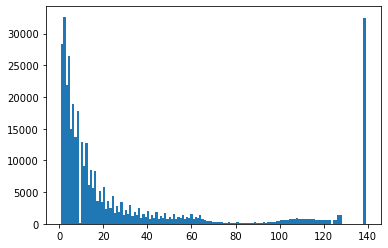

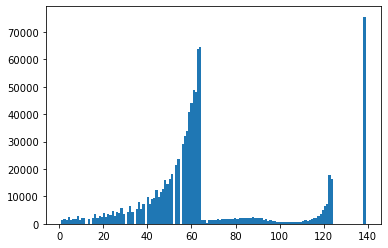

In [10]:
import matplotlib.pyplot as plt
FPGA1 = dat[(dat["FPGA"] == 1)]
FPGA0 = dat[(dat["FPGA"] == 0)]
plt.hist(FPGA1["TDC_CHANNEL"],FPGA1["TDC_CHANNEL"].max())
plt.show()
plt.hist(FPGA0["TDC_CHANNEL"],FPGA0["TDC_CHANNEL"].max())
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)



In [11]:
a=FPGA1.groupby(["TDC_CHANNEL"]).sum()
print(a.sort_values(["HEAD"],ascending=False).head(3))


l=FPGA0.groupby(["TDC_CHANNEL"]).sum()
print(l.sort_values(["HEAD"],ascending=False).head(3))

              HEAD   FPGA        ORBIT_CNT  BX_COUNTER  TDC_MEAS      ABS_TIME
TDC_CHANNEL                                                                   
2            16308  32669  126403097729581    58194220    475221  1.455252e+09
139          16190  32442  125524786978260    57995164         0  1.449879e+09
1            14253  28438  110032486229838    50854862    413328  1.271716e+09
              HEAD  FPGA        ORBIT_CNT  BX_COUNTER  TDC_MEAS      ABS_TIME
TDC_CHANNEL                                                                  
139          37845     0  292577762508697   134482540         0  3.362064e+09
64           32117     0  249877206705822   115180305    941085  2.880292e+09
63           31634     0  246561296495498   113828187    924689  2.846475e+09


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [12]:
unorb=dat["ORBIT_CNT"].unique()
print("number of unique orbits: ",len(unorb))
#print(len(unorb))


prova = dat[(dat["TDC_CHANNEL"] == 139)]
unorb139 = prova["ORBIT_CNT"].unique()
print("number of unique orbits with at least one measurement from TDC_CHANNEL=139:", len(unorb139))
#print(len(unorb139))

number of unique orbits:  11001
number of unique orbits with at least one measurement from TDC_CHANNEL=139: 10976
